# The Use of Hand Techniques as a Predictor of Tennis Players' Current Elo Rank and Years of Experience

## Introduction

Tennis is a racket sport that is reliant on different shot techniques in their repertoire (i.e. forehand, backhand). It can be played in a singles or doubles match, wherein a player wins a match by winning two/three sets in a best-of-three/best-of-five match. A set is won by winning at least six games and two games more than the opponent, and every game is won by winning a total of at least four points and their score is two points more than the opponent. 

Officially, players are assigned an Elo rating according to the Universal Tennis Rating (UTR) system, which rates players according to head-to-head results, independent of their age or nationality (Tennis CT, 2022). The UTR system factors in the opponent that a player competed against as well as the set scores in the matches. As it is used on a global scale, the UTR can be used to match players with similar Elo ratings and therefore similar abilities. This system, which is not only used globally and makes the matches more competitive, is recognized to be a helpful tool for player development and evaluator of rating tennis skills. 

In this project, we seek to answer the question: What are good predictors of players' hand techniques? We will observe the years of experience the player has (number of years played in professional Tennis) and their current Elo rank to see if these factors have a relationship in terms of determining players' hand techniques (for both dominant hand and backhand). Sheldon and Eccles (2005) found that tennis players' self-perceptions of their tennis abilities were affected by their prior skill in tennis shot abilities. These included the backhand and dominant hand, supporting our hypothesis that hand techniques have merit in predicting psychological factors in Tennis.

To help answer these questions, the dataset that will be used is the Player Stats for Top 500 Players dataset (https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS) from https://www.ultimatetennisstatistics.com/. This dataset uses a similar system to the UTR, but with an optimized new K-factor function which allows for more stabilized ratings and player rankings. 

### Section 1: Tidying the Data

#### Loading in the data

After reading the csv, we decided that the most valuable information included the players’ backhand technique, their dominant hand, the year they turned professional, and their current Elo rank. We removed any unnecessary information, such as any NAs in the data with the na.omit() function. We then mutated the classes we were predicting into a factor type and renamed the Plays column into Dominant.Hand to make the variable clearer. Next, we used the year each player turned pro to calculate the number of years they have been playing tennis professionally (2020 – Turned.Pro since this data was recorded in the year 2020). In this step, we excluded players who have already retired, since we are considering each player’s current ranking, which retired players do not have. We then removed the Turned.Pro column. Finally, we tidied up the selected columns, by removing extra information such as the date, which was not needed. 

In [1]:
# Loading Libraries, Remember to run this cell!
library(tidyverse)
library(repr)
library(tidymodels)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
# Data read from https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS
player_stats <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")
colnames(player_stats) <- make.names(colnames(player_stats))

# Cleaning up the dataframe
player_stats_clean <- player_stats %>%
#   Removing players that have retired from the dataset
    filter(is.na(Retired)) %>%
#   Remove unnecessary columns and remove columns with NA values
    select(Backhand, Plays, Turned.Pro, Current.Elo.Rank) %>%
    na.omit() %>%
#   Mutating columns with as_factor()
    mutate(Plays = as_factor(Plays)) %>%
    rename(Dominant.Hand = Plays) %>%
    mutate(Backhand = as_factor(Backhand)) %>%
#   Cleaning up columns with strings and turning them into numeric values
    mutate(Year.Experience = 2020 - Turned.Pro) %>%
    select(-Turned.Pro) %>%
    mutate(Current.Elo.Rank = strtoi(substr(Current.Elo.Rank, 0, nchar(Current.Elo.Rank)-7))) 

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



In [3]:
player_stats

X1,Age,Country,Plays,Wikipedia,Current.Rank,Best.Rank,Name,Backhand,Prize.Money,⋯,Facebook,Twitter,Nicknames,Grand.Slams,Davis.Cups,Web.Site,Team.Cups,Olympics,Weeks.at.No..1,Tour.Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


<b>Table 1.0:</b> The original dataframe loaded in.

In [4]:
player_stats_clean

Backhand,Dominant.Hand,Current.Elo.Rank,Year.Experience
<fct>,<fct>,<int>,<dbl>
Two-handed,Right-handed,144,15
Two-handed,Right-handed,100,12
Two-handed,Right-handed,33,5
⋮,⋮,⋮,⋮
Two-handed,Right-handed,143,12
Two-handed,Right-handed,180,11
One-handed,Right-handed,6,9


<b>Table 1.1:</b> Choosing the necessary columns and properfly formatting the values

Plotting Our Data

We plotted our entire tidied dataset with the two classes we were predicting: Backhand and Dominant.Hand. The reason for this was to visualize the distribution of our data before creating our model. 

In [5]:
set.seed(1234) # DO NOT REMOVE
# plotting the two predictors (Current.Elo.Rank and Year.Experience) classifying between Backhand and Dominant.Hand
back_plot <- player_stats_clean %>%
    ggplot(aes(x = Current.Elo.Rank, y = Year.Experience)) +
        geom_point(aes(shape = Backhand, color = Backhand)) +
        labs(x = "Current Elo Rank", y = "Years of Experience",
             shape = "Backhand Type", color = "Backhand Type") +
        ggtitle("Classifying Backhand Type")
                   
dominant_plot <- player_stats_clean %>%
    ggplot(aes(x = Current.Elo.Rank, y = Year.Experience)) +
        geom_point(aes(shape = Dominant.Hand, color = Dominant.Hand)) +
        labs(x = "Current Elo Rank", y = "Years of Experience",
             shape = "Dominant Hand", color = "Dominant Hand") +
        ggtitle("Classifying Dominant Hand")

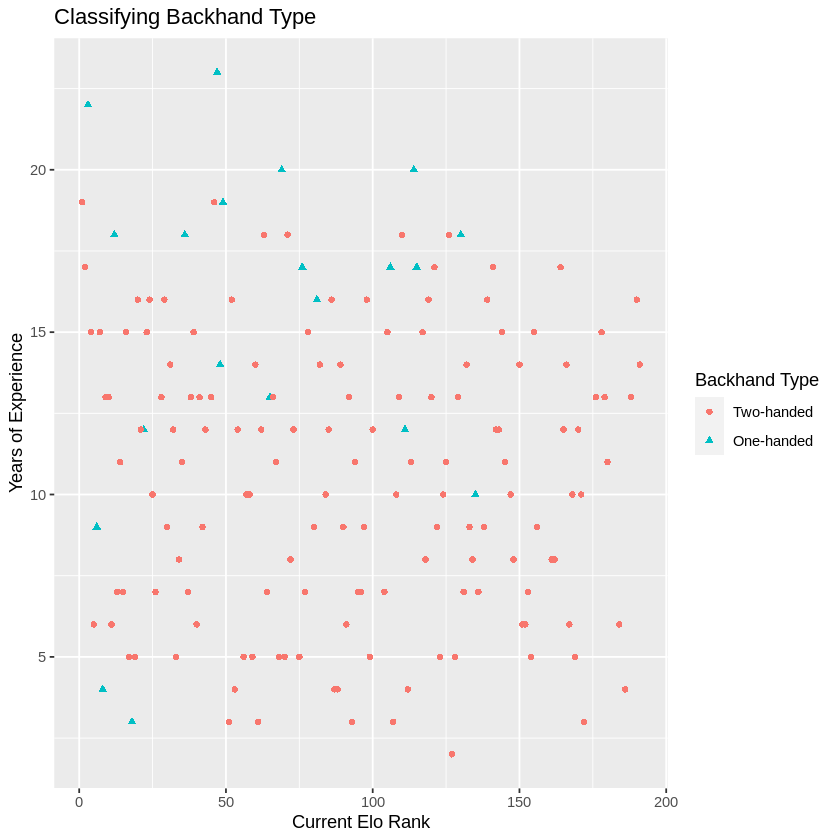

In [6]:
back_plot

<b>Figure 1.0:</b> Plot distinguishing between type of backhand using Current.Elo.Rank as the x-axis and Year.Experience as the y-axis

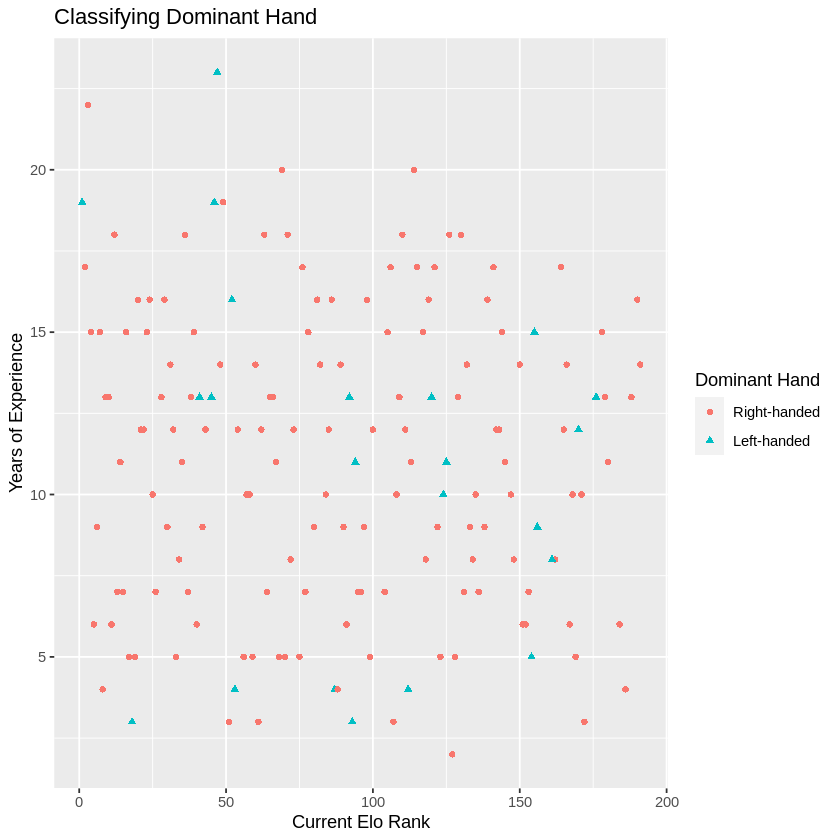

In [7]:
dominant_plot

<b>Figure 1.1:</b> Plot distinguishing between the player's dominant hand using the same variables as <b>Figure 1.0</b>

### Section 2: Choosing our best k value

#### Splitting Our Data

We created two 75% splits with our dataset into a training and testing set, using Backhand and Dominant.Hand as the classes we are predicting. 

In [8]:
set.seed(1234) # DO NOT REMOVE
# Making the training and testing splits for each of the predictions
back_split <- initial_split(player_stats_clean, prop = .75, strata = Backhand)
back_training <- training(back_split)
back_testing <- testing(back_split)

dominant_split <- initial_split(player_stats_clean, prop = .75, strata = Dominant.Hand)
dominant_training <- training(dominant_split)
dominant_testing <- testing(dominant_split)

In [9]:
back_training

Backhand,Dominant.Hand,Current.Elo.Rank,Year.Experience
<fct>,<fct>,<int>,<dbl>
Two-handed,Right-handed,144,15
Two-handed,Right-handed,100,12
Two-handed,Right-handed,4,15
⋮,⋮,⋮,⋮
Two-handed,Right-handed,143,12
Two-handed,Right-handed,180,11
One-handed,Right-handed,6,9


<b>Table 2.0:</b> Training dataset used for the backhand classification model.

In [10]:
back_testing

Backhand,Dominant.Hand,Current.Elo.Rank,Year.Experience
<fct>,<fct>,<int>,<dbl>
Two-handed,Right-handed,33,5
Two-handed,Right-handed,51,3
Two-handed,Right-handed,5,6
⋮,⋮,⋮,⋮
Two-handed,Right-handed,28,13
Two-handed,Right-handed,89,14
Two-handed,Right-handed,63,18


<b>Table 2.1:</b> Testing dataset used for the backhand classification model.

In [11]:
dominant_training

Backhand,Dominant.Hand,Current.Elo.Rank,Year.Experience
<fct>,<fct>,<int>,<dbl>
Two-handed,Right-handed,144,15
Two-handed,Right-handed,100,12
Two-handed,Right-handed,51,3
⋮,⋮,⋮,⋮
Two-handed,Right-handed,186,4
Two-handed,Right-handed,180,11
One-handed,Right-handed,6,9


<b>Table 2.2:</b> Training dataset used for the dominant hand classification model.

In [12]:
dominant_testing

Backhand,Dominant.Hand,Current.Elo.Rank,Year.Experience
<fct>,<fct>,<int>,<dbl>
Two-handed,Right-handed,33,5
Two-handed,Right-handed,56,5
Two-handed,Right-handed,31,14
⋮,⋮,⋮,⋮
Two-handed,Right-handed,95,7
Two-handed,Right-handed,70,5
Two-handed,Right-handed,143,12


<b>Table 2.3:</b> Testing dataset used for the dominant classification model.

#### Creating Our Recipes

We created a recipe for our model using Current.Elo.Rank and Years.Experience as our predictors and Backhand and Dominant.Hand once again as the classes we are predicting. 

In [13]:
set.seed(1234) # DO NOT REMOVE
# Creating the Recipes
back_recipe <- recipe(Backhand ~ Current.Elo.Rank + Year.Experience, data = back_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

dominant_recipe <- recipe(Dominant.Hand ~ Current.Elo.Rank + Year.Experience, data = dominant_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

#### Creating Our Workflow

For each training set, we created 5 vfolds. We then used the tune() function within the workflow we created to choose the best values for k. We then collected the metrics and plotted it to visualize our best k.

In [14]:
set.seed(1234)

# Creating the vfolds for cross-validation
back_vfold <- vfold_cv(back_training, v = 5, strata = Backhand)
dominant_vfold <- vfold_cv(dominant_training, v = 5, strata = Dominant.Hand)

In [15]:
set.seed(1234)
# Making the tune spec to choose the best value of k
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
        set_engine("kknn") %>%
        set_mode("classification")

In [16]:
set.seed(1234) # DO NOT REMOVE
# Collecting metrics and filtering for accuracies to determine best value of k
back_accuracies <- workflow() %>%
    add_recipe(back_recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = back_vfold, grid = 10) %>%
    collect_metrics %>%
    filter(.metric == "accuracy")

dominant_accuracies <- workflow() %>%
    add_recipe(dominant_recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = dominant_vfold, grid = 10) %>%
    collect_metrics %>%
    filter(.metric == "accuracy")

In [17]:
back_accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.7776667,5,0.03682013,Model01
3,accuracy,binary,0.8603333,5,0.03227228,Model02
4,accuracy,binary,0.8603333,5,0.03227228,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
12,accuracy,binary,0.876,5,0.001,Model08
13,accuracy,binary,0.876,5,0.001,Model09
14,accuracy,binary,0.876,5,0.001,Model10


<b>Table 2.4:</b> Table of accuracies of 10 different values of k for the backhand classification model.

In [18]:
dominant_accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7866667,5,0.024386927,Model1
3,accuracy,binary,0.7873333,5,0.018867962,Model2
5,accuracy,binary,0.8610000,5,0.008573214,Model3
⋮,⋮,⋮,⋮,⋮,⋮,⋮
10,accuracy,binary,0.861,5,0.008573214,Model7
12,accuracy,binary,0.861,5,0.008573214,Model8
14,accuracy,binary,0.861,5,0.008573214,Model9


<b>Table 2.5:</b> Table of accuracies of 10 different values of k for the dominant hand classification model.

In [19]:
set.seed(1234) # DO NOT REMOVE
# plotting accuracies vs value of k for backhand and dominant hand
back_accuracy_vs_k <-ggplot(back_accuracies,aes(x = neighbors, y = mean)) +
  geom_point()+
  geom_line()+
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  ggtitle("Backhand Accuracy") +
  scale_x_continuous(breaks = seq(1, 14, by = 1))

dominant_accuracy_vs_k <-ggplot(dominant_accuracies,aes(x = neighbors, y = mean)) +
  geom_point()+
  geom_line()+
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  ggtitle("Dominant Hand Accuracy") +
  scale_x_continuous(breaks = seq(1, 14, by = 1))

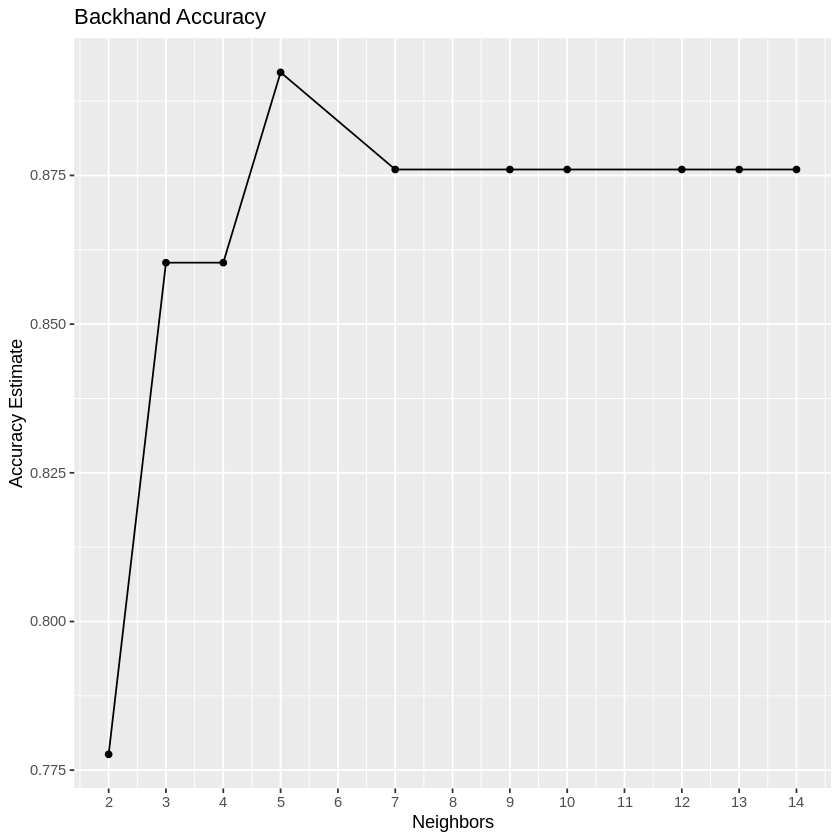

In [20]:
back_accuracy_vs_k

<b>Figure 2.0:</b> Plot of the accuracy vs number of neighbors for the backhand model.

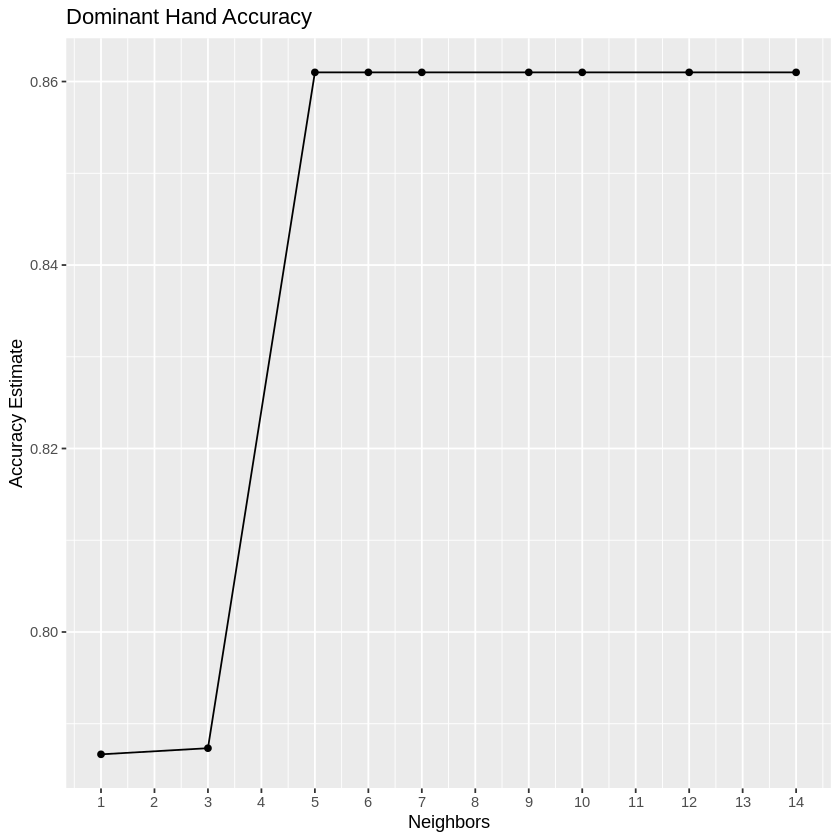

In [21]:
dominant_accuracy_vs_k

<b>Figure 2.1:</b> Plot of the accuracy vs number of neighbors for the dominant hand model.

Looking at our two plots, the number of k with the highest accurcay for predicting a player's Backhand technique would be <b>k = 12</b> and for Dominant Hand, <b>k = 5</b>

### Section 3: Creating the Models

After determining our best k’s, we created a model specification as well as new workflow for each class we were predicting.

In [28]:
set.seed(1234) # DO NOT REMOVE
# Creating models using k = 12 for backhand, k = 5 for dominant hand
back_best_k <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) %>%
    set_engine("kknn") %>%
    set_mode("classification")

dominant_best_k <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

back_fit <- workflow() %>%
    add_recipe(back_recipe) %>%
    add_model(back_best_k) %>%
    fit(data = back_training)

dominant_fit <- workflow() %>%
    add_recipe(dominant_recipe) %>%
    add_model(dominant_best_k) %>%
    fit(data = dominant_training)

Using our best k's, we predicted the classes of our testing dataset. 

In [29]:
set.seed(1234) # DO NOT REMOVE
# Making predictions using the classification model on the testing dataset
back_predictions <- back_fit %>%
    predict(back_testing) %>%
    bind_cols(back_testing) 

back_accuracy <- back_predictions %>%
    metrics(truth = Backhand, estimate = .pred_class)

dominant_predictions <- dominant_fit %>%
    predict(dominant_testing) %>%
    bind_cols(dominant_testing)

dominant_accuracy <- dominant_predictions %>%
    metrics(truth = Dominant.Hand, estimate = .pred_class)

In [30]:
back_predictions

.pred_class,Backhand,Dominant.Hand,Current.Elo.Rank,Year.Experience
<fct>,<fct>,<fct>,<int>,<dbl>
Two-handed,Two-handed,Right-handed,33,5
Two-handed,Two-handed,Right-handed,51,3
Two-handed,Two-handed,Right-handed,5,6
⋮,⋮,⋮,⋮,⋮
Two-handed,Two-handed,Right-handed,28,13
Two-handed,Two-handed,Right-handed,89,14
Two-handed,Two-handed,Right-handed,63,18


<b>Table 3.0:</b> Testing dataset with the prediction of the type of backhand made by the classification model.

In [25]:
dominant_predictions

.pred_class,Backhand,Dominant.Hand,Current.Elo.Rank,Year.Experience
<fct>,<fct>,<fct>,<int>,<dbl>
Right-handed,Two-handed,Right-handed,33,5
Right-handed,Two-handed,Right-handed,56,5
Right-handed,Two-handed,Right-handed,31,14
⋮,⋮,⋮,⋮,⋮
Right-handed,Two-handed,Right-handed,95,7
Right-handed,Two-handed,Right-handed,70,5
Right-handed,Two-handed,Right-handed,143,12


<b>Table 3.1:</b> Testing dataset with the prediction of the player's dominant hand made by the classification model

We collected metrics to determine our models’ accuracies. Finally, we cleaned up the metrics datasets to leave us with just the accuracy of our predictions for each testing set. 

In [26]:
set.seed(1234) # DO NOT REMOVE
# Calculating the accuracy of the predictions the classification model made
back_accuracy <- back_predictions %>%
    metrics(truth = Backhand, estimate = .pred_class) %>%
    filter(.metric == "accuracy") %>%
    select(.estimate) %>%
    pull()

dominant_accuracy <- dominant_predictions %>%
    metrics(truth = Dominant.Hand, estimate = .pred_class) %>%
    filter(.metric == "accuracy") %>%
    select(.estimate) %>%
    pull()

In [27]:
print(paste("Accuracy of the backhand classification model: ", back_accuracy))
print(paste("Accuracy of the dominant hand classification model: ", dominant_accuracy))

[1] "Accuracy of the backhand classification model:  0.875"
[1] "Accuracy of the dominant hand classification model:  0.871794871794872"


## Discussion

From our analysis, we found that our model had about 87.50% accuracy when predicting the player’s backhand technique. When predicting their dominant hand, it had about 87.18% accuracy. In the initial phases of our analysis, we noticed that there were significantly more players that used a two-handed backhand technique, as well as significantly more right-handed players from the beginning plots (Figure 1.0 & 1.1). We speculate that the model could be inaccurate because of the bias in the population. If we had a population with a more even distribution between one or two-handed and left or right-handed, the model could be improved. Because we chose the k with the highest accuracy, we speculate that this could affect the accuracy of our model, resulting in overfitting of the model. A limitation of our analysis is that we only used two predictors for our model. We believe this could improve this model by using more than just two variables in the classification model (ex. Age, height, weight, etc.). 

Prior to conducting our data analysis, we expected to create a somewhat accurate model to predict top tennis players’ dominant hand as well as how many hands they use for their backhand. However, from looking at the entire dataset, there did not seem to be a strong relationship between the players’ technique and their ranking. 

From our analysis, we predicted the backhand method as well as the dominant hand of top tennis players. From our findings, it could lead to research into how to train effectively. For example, while a player cannot simply change their dominant hand, they could change their backhand technique from using one hand to two. Doing so could potentially lead to a boost in the players’ performance. 

From our analysis, we only predicted 2 things. Given how much information the original dataset has, we could try to make observations about other categories such as a classification model for the player’s country. We could also turn to regression models. This could lead to other questions such as predicting a player’s rank given their age and years’ experience. or predicting a player’s current rank given the total prize money they have earned and the number of seasons they played in. 

## Conclusion

To summarize, we were able to determine that the years of experience and the current Elo rank of players are good predictors for a player’s backhand technique and their dominant hand. From our results, we found that both models were sufficiently accurate at predicting the players’ Backhand technique as well as dominant hand, with about 87% accuracy each. However, this accuracy may not be a correct representation as our data was biased towards right-handed and two-handed backhand players to begin with. 

## References 

Cekovic, Mileta. Ultimate Tennis Statistics, 2015. https://www.ultimatetennisstatistics.com/

Cekovic, Mileta. “Peak Elo Ratings.” Ultimate Tennis Statistics - Peak Elo Ratings, 2015. https://www.ultimatetennisstatistics.com/peakEloRatings#

Sheldon, Jane P., & Eccles, Jacquelynne S. Physical and psychological predictors of perceived ability in adult male and female tennis players. *Journal of Applied Sport Psychology, 17*(1), 48-63, 2005. https://doi.org/10.1080/10413200590907568

Tennis CT. *UNIVERSAL TENNIS RATINGS (UTR)*. Tennis CT, n.d. https://www.tennisct.com/utr-ratings

Sprouse, Mike. “Universal Tennis: UTR Rating: Better UTR: Improve UTR: How UTR Works: Tennis: Play Tennis: CT: Connecticut: Stamford: New Haven: Hartford: Covid Tennis: Tennis Blog: Tennis Lessons.” Tennis, 2020. https://www.tennisct.com/utr-ratings